In [10]:
import sys
import os
sys.path.append("../")
from corpus.FilmCorpus import FilmCorpus
from corpus.CornellCorpus import CornellCorpus
import matplotlib.pyplot as plt
from difflib import SequenceMatcher
import re
import json
import numpy as np
%matplotlib inline

In [2]:
api = FilmCorpus("/home/tonyzhao/Documents/Projects/DeepLearningProject/Data")
cornell_api = CornellCorpus("/home/tonyzhao/Documents/Projects/DeepLearningProject/CornellData")

Done parsing 959 films with 1350026 utts
Loaded 617 films dialogs with total 304713 utterances


In [4]:
api.dialogs.keys()

['15minutes_dialog.txt',
 'conanthebarbarian_dialog.txt',
 'jasonx_dialog.txt',
 'newsies_dialog.txt',
 'boondocksaintsthe_dialog.txt',
 'knockedup_dialog.txt',
 'silverliningsplaybook_dialog.txt',
 'theressomethingaboutmary_dialog.txt',
 '2012_dialog.txt',
 'traffic_dialog.txt',
 'starshiptroopers_dialog.txt',
 'bloodandwine_dialog.txt',
 'twoforthemoney_dialog.txt',
 'whileshewasout_dialog.txt',
 'tallinthesaddle_dialog.txt',
 'assignmentthe_dialog.txt',
 'romeojuliet_dialog.txt',
 'slumdogmillionaire_dialog.txt',
 'cars2_dialog.txt',
 'batman2_dialog.txt',
 'threekingsspoilsofwar_dialog.txt',
 'idesofmarchthe_dialog.txt',
 'jacketthe_dialog.txt',
 'brick_dialog.txt',
 'cirquedufreakthevampiresassistant_dialog.txt',
 'allthepresidentsmen_dialog.txt',
 'sexandthecity_dialog.txt',
 'logansrun_dialog.txt',
 'losthighway_dialog.txt',
 'goodwillhunting_dialog.txt',
 'bladetrinity_dialog.txt',
 'graduatethe_dialog.txt',
 'deepcover_dialog.txt',
 'feast_dialog.txt',
 'bookofelithe_dialog.tx

In [4]:
dialog_len = [len(d) for d in api.dialogs.values()]

In [5]:
api.dump_dialogs()

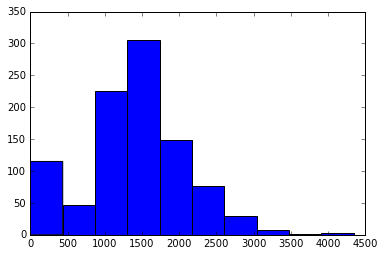

In [6]:
fig = plt.hist(dialog_len)
plt.show()

## Find major character

In [6]:
def collect_character_info(dialog):
    char_word_cnt = {}
    for char, line in dialog:
        cnt = char_word_cnt.get(char, 0)
        char_word_cnt[char] = cnt + len(line.split())
    temp = [(cnt, char) for char, cnt in char_word_cnt.iteritems()]
    return sorted(temp, reverse=True)

In [7]:
char_wcs = [collect_character_info(d) for d in api.dialogs.values()]

In [5]:
prot = api.get_protagonists()

In [9]:
f = open('major_char.json', 'wb')
import json
json.dump(prot, f)
f.close()

In [6]:
ratio = [float(major_cnt)/(major_cnt+bg_cnt) for (major_cnt, major), (bg_cnt, bg) in prot.values()]

(array([  65.,  284.,  327.,  185.,   62.,   18.,    4.,    0.,    0.,   14.]),
 array([ 0.05863014,  0.15276712,  0.24690411,  0.3410411 ,  0.43517808,
         0.52931507,  0.62345205,  0.71758904,  0.81172603,  0.90586301,  1.        ]),
 <a list of 10 Patch objects>)

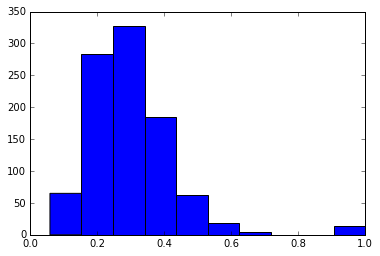

In [7]:
plt.hist(ratio)

In [8]:
np.mean(ratio)

0.30117506752893003

In [9]:
api.dialogs.keys()

['15minutes_dialog.txt',
 'conanthebarbarian_dialog.txt',
 'jasonx_dialog.txt',
 'newsies_dialog.txt',
 'boondocksaintsthe_dialog.txt',
 'knockedup_dialog.txt',
 'silverliningsplaybook_dialog.txt',
 'theressomethingaboutmary_dialog.txt',
 '2012_dialog.txt',
 'traffic_dialog.txt',
 'starshiptroopers_dialog.txt',
 'bloodandwine_dialog.txt',
 'twoforthemoney_dialog.txt',
 'whileshewasout_dialog.txt',
 'tallinthesaddle_dialog.txt',
 'assignmentthe_dialog.txt',
 'romeojuliet_dialog.txt',
 'slumdogmillionaire_dialog.txt',
 'cars2_dialog.txt',
 'batman2_dialog.txt',
 'threekingsspoilsofwar_dialog.txt',
 'idesofmarchthe_dialog.txt',
 'jacketthe_dialog.txt',
 'brick_dialog.txt',
 'cirquedufreakthevampiresassistant_dialog.txt',
 'allthepresidentsmen_dialog.txt',
 'sexandthecity_dialog.txt',
 'logansrun_dialog.txt',
 'losthighway_dialog.txt',
 'goodwillhunting_dialog.txt',
 'bladetrinity_dialog.txt',
 'graduatethe_dialog.txt',
 'deepcover_dialog.txt',
 'feast_dialog.txt',
 'bookofelithe_dialog.tx

In [10]:
prot['hitchhikersguidetothegalaxythe_dialog.txt']

((2706, 'ARTHUR'), (15486, 'background'))

In [11]:
prot['batman2_dialog.txt']

((3839, 'BRUCE'), (27867, 'background'))

617

In [3]:
f_norm_films = [name.replace("_dialog.txt", "").lower().replace("the", "") for name in api.dialogs.keys()]

In [4]:
c_norm_films = [re.sub(r'[\W_]+', "", name.lower()).replace("the", "") for name in cornell_api.films.values()]
print(c_norm_films[0])

shakespeareinlove


In [5]:
diff = set(c_norm_films) - set(f_norm_films)
print len(diff)

218


In [6]:
diff = []
for c_f in c_norm_films:
    if c_f in f_norm_films:
        continue
    found = False
    for f_f in f_norm_films:
        if SequenceMatcher(None, c_f, f_f).ratio() > 0.9:
            print (f_f, c_f)
            found = True
            break
    if not found:
        diff.append(c_f)

('terminator2judgementday', 'terminator2judgmentday')
('startrekiiwrathofkhan', 'startrekwrathofkhan')
('nightmareonelmstreeta', 'anightmareonelmstreet')
('glengarryglengross', 'glengarryglenross')
('walktoremembera', 'awalktoremember')
('grossepointblank', 'grossepointeblank')
('loveandbasketball', 'lovebasketball')
('airplane2sequel', 'airplaneiisequel')
('americanwerewolfinlondon', 'anamericanwerewolfinlondon')
('mightymorphinpowerrangersmovie', 'mightymorphinpowerrangers')
('producer', 'producers')
('mygirl', 'mygirl2')
('hellraiser3hellonearth', 'hellraiseriiihellonearth')
('ghostbusters2', 'ghostbusters')


In [7]:
cornell_api.dump_dialogs(exclude_names=f_norm_films)

Save 218 films


In [14]:
json.dump(t, open("film.json", "wb"))

In [13]:
ff = {k:re.sub(r'[^\x00-\x7F]+',' ', v)  for k, v in cornell_api.films.iteritems()}
cc = {k:re.sub(r'[^\x00-\x7F]+',' ', v)  for k, v in cornell_api.characters.iteritems()}

In [15]:
json.dump(cornell_api.characters, open("character.json", "wb"))

UnicodeDecodeError: 'utf8' codec can't decode byte 0xc9 in position 1: invalid continuation byte

In [16]:
cornell_api.characters

{'u1318 ': {'gender': '?', 'movie_id': 'm88', 'name': 'IAN'},
 'u8320 ': {'gender': '?', 'movie_id': 'm565', 'name': 'CATHERINE'},
 'u4662 ': {'gender': 'm', 'movie_id': 'm309', 'name': 'LAMAR'},
 'u7111 ': {'gender': 'm', 'movie_id': 'm476', 'name': 'JAMES'},
 'u181 ': {'gender': '?', 'movie_id': 'm12', 'name': 'JIMMY'},
 'u551 ': {'gender': '?', 'movie_id': 'm35', 'name': 'BUTCHER'},
 'u584 ': {'gender': '?', 'movie_id': 'm37', 'name': 'CHAFFEY'},
 'u8753 ': {'gender': '?', 'movie_id': 'm593', 'name': 'ROONEY'},
 'u8272 ': {'gender': 'f', 'movie_id': 'm562', 'name': 'ESTHER'},
 'u3749 ': {'gender': '?', 'movie_id': 'm247', 'name': 'COLBY'},
 'u1840 ': {'gender': '?', 'movie_id': 'm121', 'name': 'DAN'},
 'u1815 ': {'gender': '?', 'movie_id': 'm120', 'name': 'DOCTOR'},
 'u488 ': {'gender': 'm', 'movie_id': 'm30', 'name': 'AMOS'},
 'u8530 ': {'gender': '?', 'movie_id': 'm578', 'name': 'MRS. BAKER'},
 'u679 ': {'gender': '?', 'movie_id': 'm43', 'name': 'DRIVER'},
 'u6519 ': {'gender': '?